In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
df = pd.read_excel(r"C:\Users\arnab\Documents\DATA SCIENCE\DATASETS\Flight_Fare_Prediction.xlsx")

In [168]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Thursday
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,Wednesday
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,Saturday
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,Saturday
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,Thursday


In [142]:
df.shape

(10683, 12)

In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Weekday          10683 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1001.7+ KB


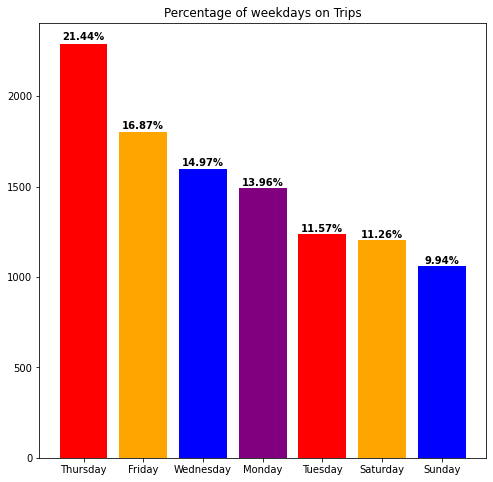

In [167]:
df['Weekday'] = pd.to_datetime(df['Date_of_Journey']).dt.day_name()
df_JDate = df['Weekday'].value_counts().to_frame().reset_index().rename(columns={'index': 'Day', 'Weekday': 'Trips'})
df_JDate['Percentage'] = ((df_JDate['Trips']/df.shape[0])*100).round(2)
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(df_JDate.Day,df_JDate.Trips, color = colors_list)
plt.title('Percentage of weekday on Trips')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(df_JDate.iloc[i, 2])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

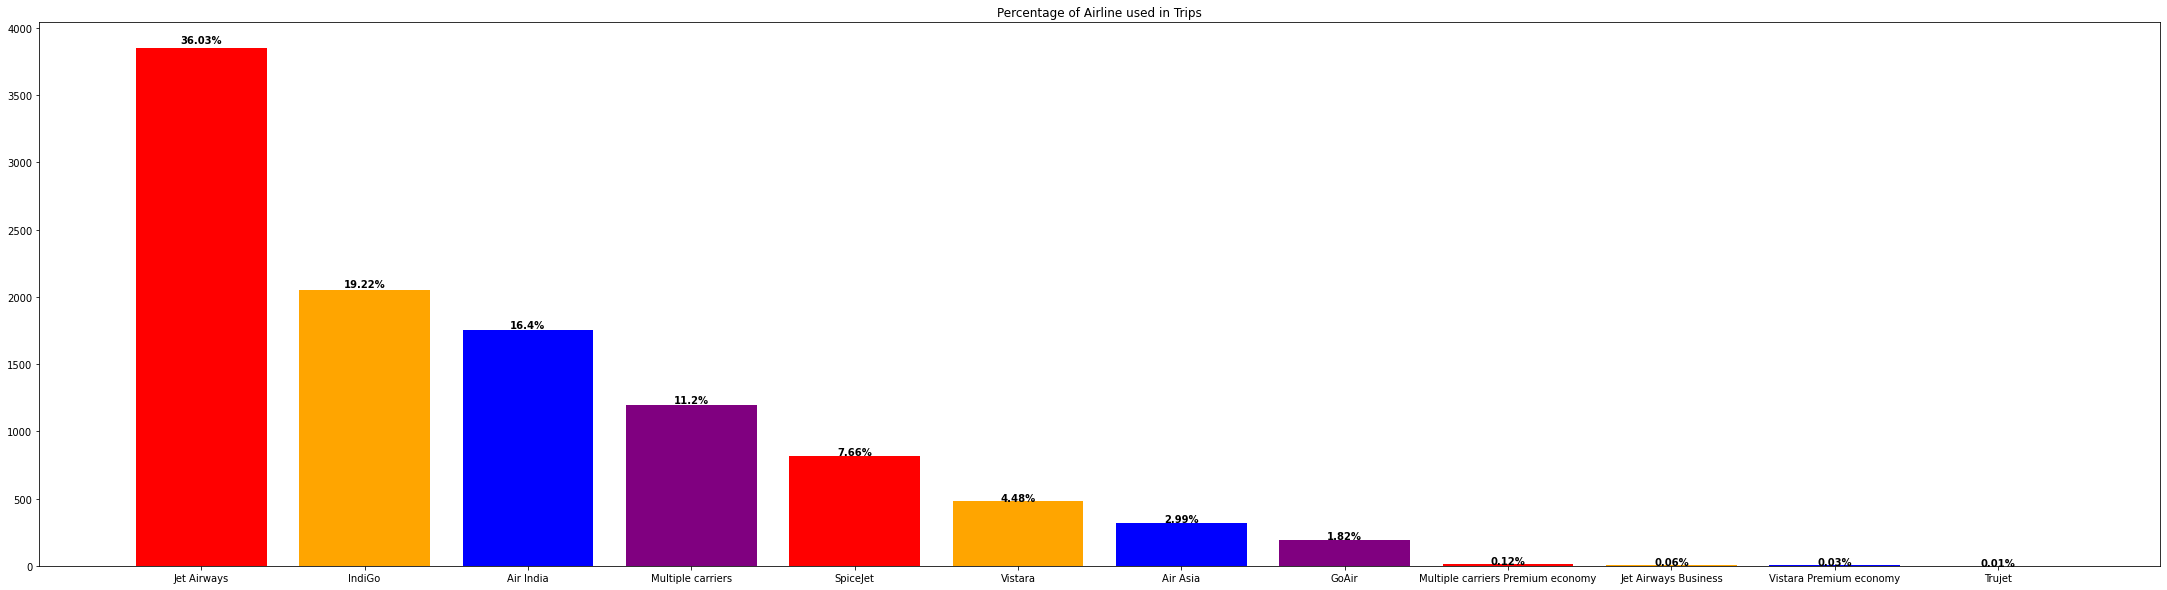

,Airline,Trips,Percentage
0,Jet Airways,3849,36.03
1,IndiGo,2053,19.22
2,Air India,1752,16.40
3,Multiple carriers,1196,11.20
4,SpiceJet,818,7.66
5,Vistara,479,4.48
6,Air Asia,319,2.99
7,GoAir,194,1.82
8,Multiple carriers Premium economy,13,0.12
9,Jet Airways Business,6,0.06


In [166]:
df_Airline = df['Airline'].value_counts().to_frame().reset_index().rename(columns={'index': 'Airline', 'Airline': 'Trips'})
df_Airline['Percentage'] = ((df_Airline['Trips']/df.shape[0])*100).round(2)
plt.figure(figsize=(38,10))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(df_Airline.Airline,df_Airline.Trips, color = colors_list)
plt.title('Most Used Airline')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(df_Airline.iloc[i, 2])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

df_Airline

In [172]:
#Numerical and Categorical Variable
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Date_of_Journey', 'Price']
We have 10 categorical features : ['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Weekday']


In [199]:
#Proportion of data count on Categorical Columns
for col in categorical_features:
    print((df[col].value_counts()/df.shape[0])*100)
    print('--------------------------------------------')

Jet Airways                          36.029205
IndiGo                               19.217448
Air India                            16.399888
Multiple carriers                    11.195357
SpiceJet                              7.657025
Vistara                               4.483759
Air Asia                              2.986053
GoAir                                 1.815969
Multiple carriers Premium economy     0.121689
Jet Airways Business                  0.056164
Vistara Premium economy               0.028082
Trujet                                0.009361
Name: Airline, dtype: float64
--------------------------------------------
Delhi       42.469344
Kolkata     26.874473
Banglore    20.565384
Mumbai       6.524385
Chennai      3.566414
Name: Source, dtype: float64
--------------------------------------------
Cochin       42.469344
Banglore     26.874473
Delhi        11.841243
New Delhi     8.724141
Hyderabad     6.524385
Kolkata       3.566414
Name: Destination, dtype: float64
-----

In [245]:
Price = df[df['Route'] == 'DEL → BOM → COK']['Price'].mean()
Price_Low = df[df['Route'] == 'DEL → BOM → COK']['Price'].min()
Price_High = df[df['Route'] == 'DEL → BOM → COK']['Price'].max()
print("Ticket Costs in the most busiest route")
print(f'The mean price of the most travelled route DEL → BOM → COK is {Price:.2f} Rupees')
print(f'The lowest price of the most travelled route DEL → BOM → COK is {Price_Low:.2f} Rupees')
print(f'The highest price of the most travelled route DEL → BOM → COK is {Price_High:.2f} Rupees')
print('------------------------------------------------------------')

print("Airlines Operated in the most busiest route")

Airline_Route_lowest = df[df['Route'] == 'DEL → BOM → COK']['Airline'].min()
Airline_Route_highest = df[df['Route'] == 'DEL → BOM → COK']['Airline'].max()
print(f'The lowest price of the most travelled route DEL → BOM → COK is {Airline_Route_lowest}')
print(f'The highest price of the most travelled route DEL → BOM → COK is {Airline_Route_highest}')

Ticket Costs in the most busiest route
The mean price of the most travelled route DEL → BOM → COK is 10954.21 Rupees
The lowest price of the most travelled route DEL → BOM → COK is 3876.00 Rupees
The highest price of the most travelled route DEL → BOM → COK is 36983.00 Rupees
------------------------------------------------------------
Airlines Operated in the most busiest route
The lowest price of the most travelled route DEL → BOM → COK is Air India
The highest price of the most travelled route DEL → BOM → COK is Multiple carriers Premium economy


In [270]:
Min_Price_Route = df.groupby('Route').Price.min()
df_Min_Price_Route = Min_Price_Route.to_frame().sort_values('Price',ascending=True)
print('Top 10 Cheapest Routes')
df_Min_Price_Route[:10]

Top 10 Cheapest Routes


,Price
Route,
BOM → HYD,1759
MAA → CCU,3145
BLR → DEL,3257
CCU → HYD → BLR,3480
CCU → BLR,3514
DEL → BOM → COK,3876
BLR → HYD → DEL,4049
DEL → PNQ → COK,4098
DEL → AMD → COK,4106


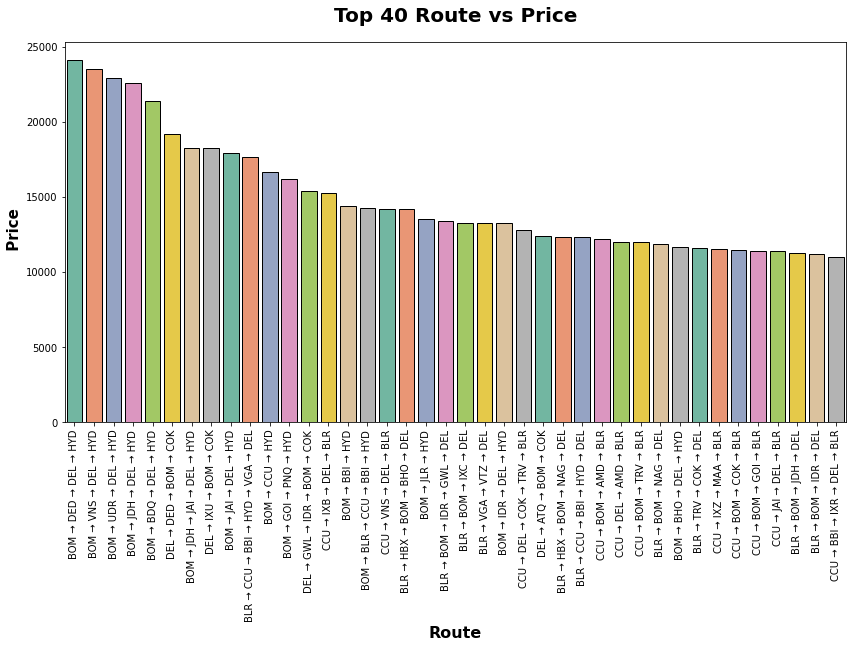

In [277]:
plt.subplots(figsize=(14,7))
sns.barplot(x=Min_Price_Route.sort_values(ascending = False).index[:40], y=Min_Price_Route.sort_values(ascending = False).values[:40],ec = "black",palette="Set2")
plt.title("Top 40 Route vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel(" Price", weight="bold", fontsize=15)
plt.xlabel("Route", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [255]:
#Chi square Test: Categorical variables to Price

from scipy.stats import  chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else: chi2_test.append('fail to reject the null hypothesis')
        
result = pd.DataFrame(data = [categorical_features, chi2_test]).T
result.columns = ['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,Airline,Reject Null Hypothesis
1,Source,Reject Null Hypothesis
2,Destination,Reject Null Hypothesis
3,Route,Reject Null Hypothesis
4,Dep_Time,Reject Null Hypothesis
5,Arrival_Time,Reject Null Hypothesis
6,Duration,Reject Null Hypothesis
7,Total_Stops,Reject Null Hypothesis
8,Additional_Info,Reject Null Hypothesis
9,Weekday,Reject Null Hypothesis


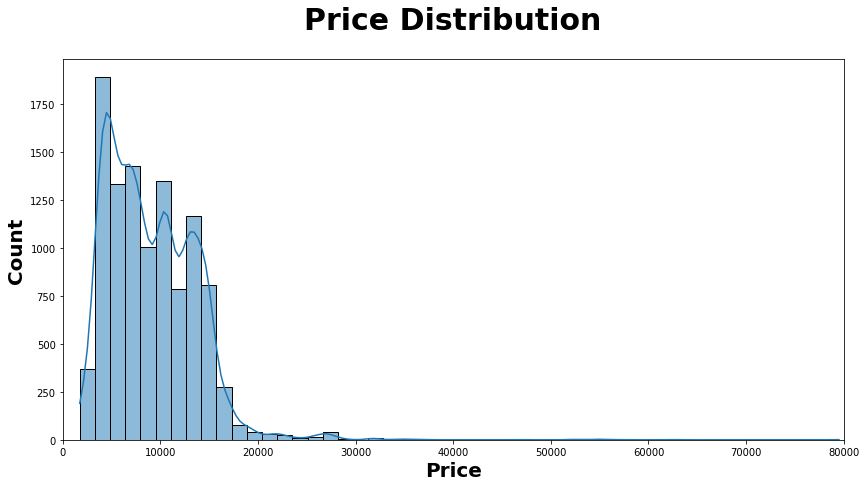

In [268]:
plt.subplots(figsize=(14,7))
sns.histplot(df.Price, kde = True, bins = 50)
plt.title("Price Distribution", weight="bold",fontsize=30, pad=30)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Price", weight="bold", fontsize=20)
plt.xlim(0,80000)
plt.show()

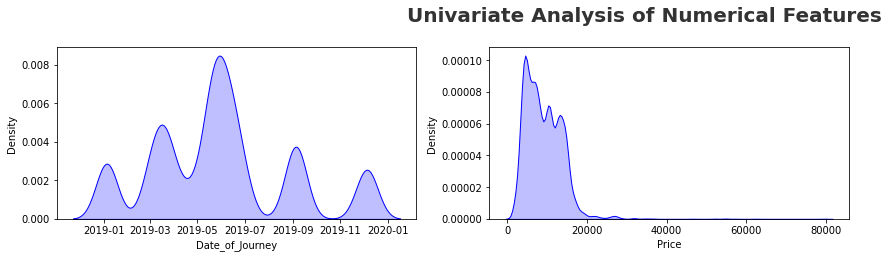

In [179]:
#Univariate Analysis
plt.figure(figsize=(18, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

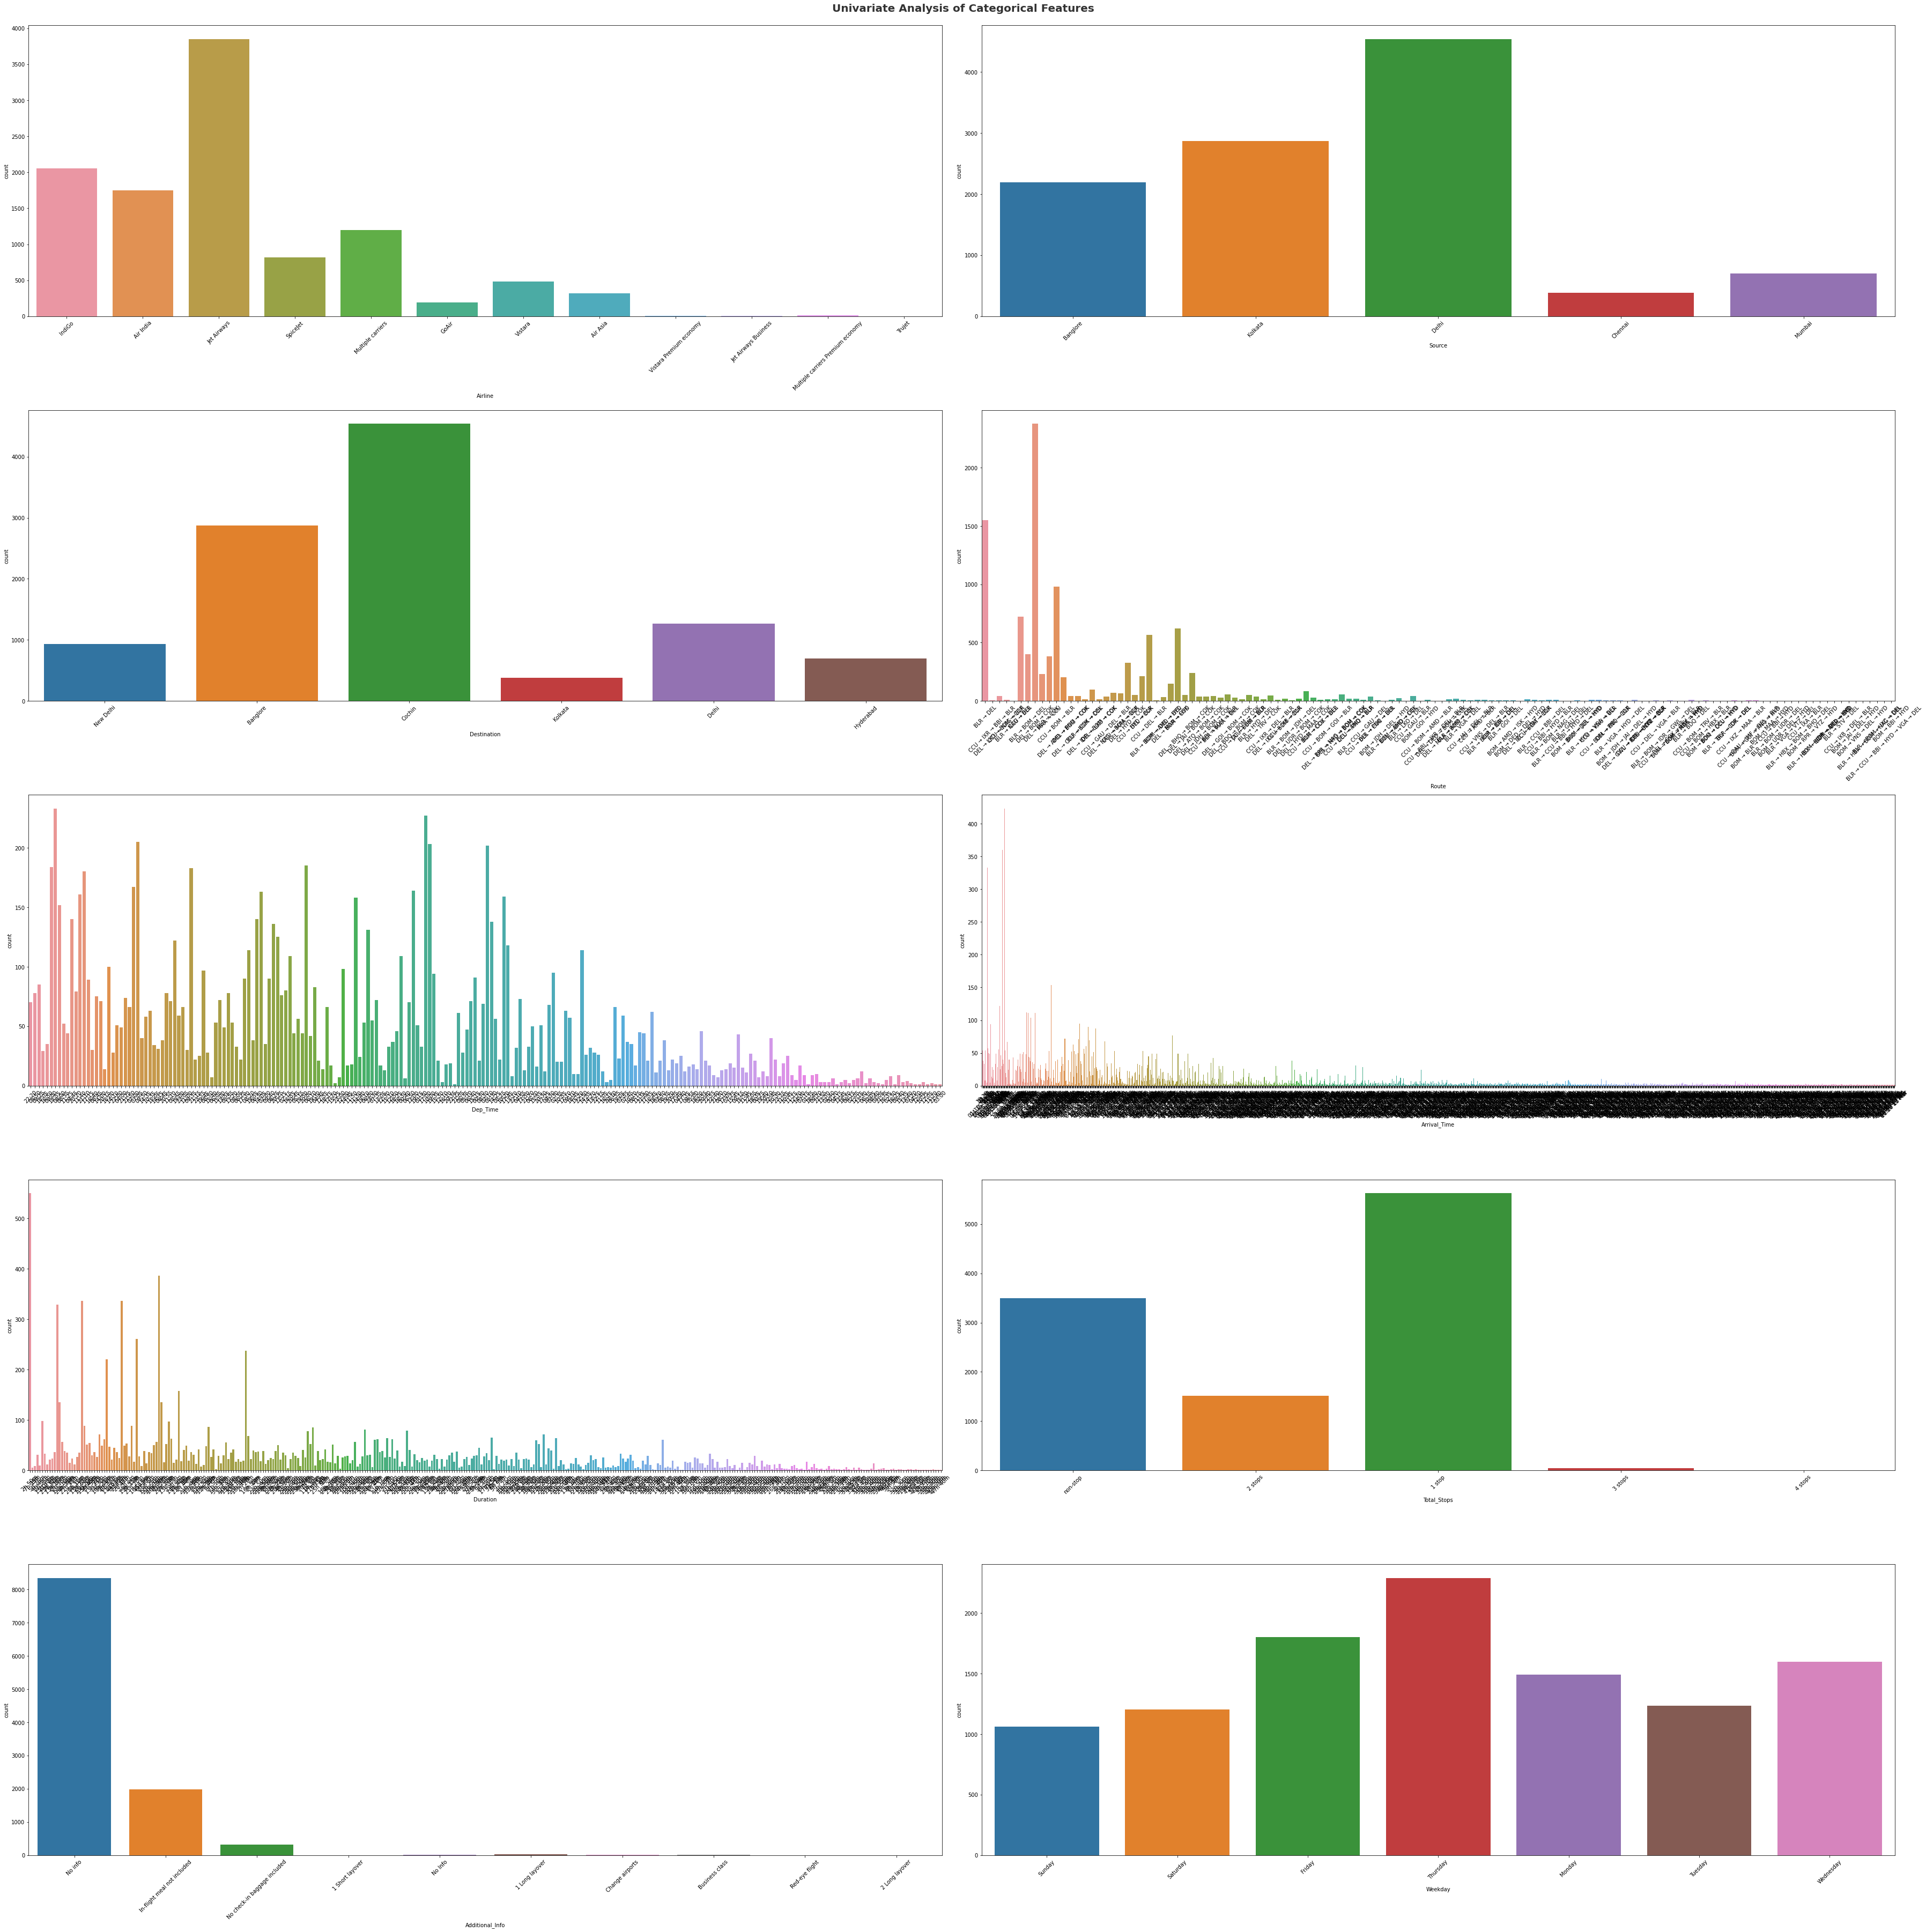

In [186]:
# categorical columns
plt.figure(figsize=(50, 50))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Weekday']
for i in range(0, len(category)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[category[i]])
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<Axes: xlabel='Airline', ylabel='Price'>

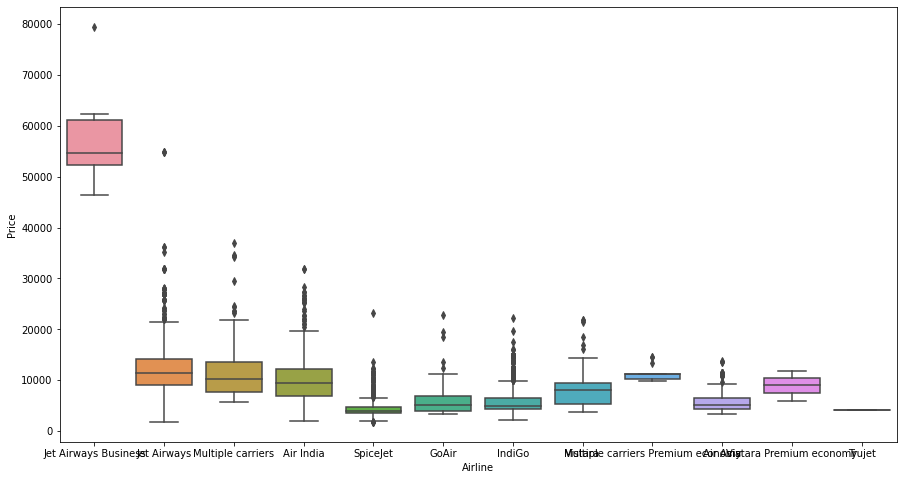

In [194]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Additional_Info', ylabel='Price'>

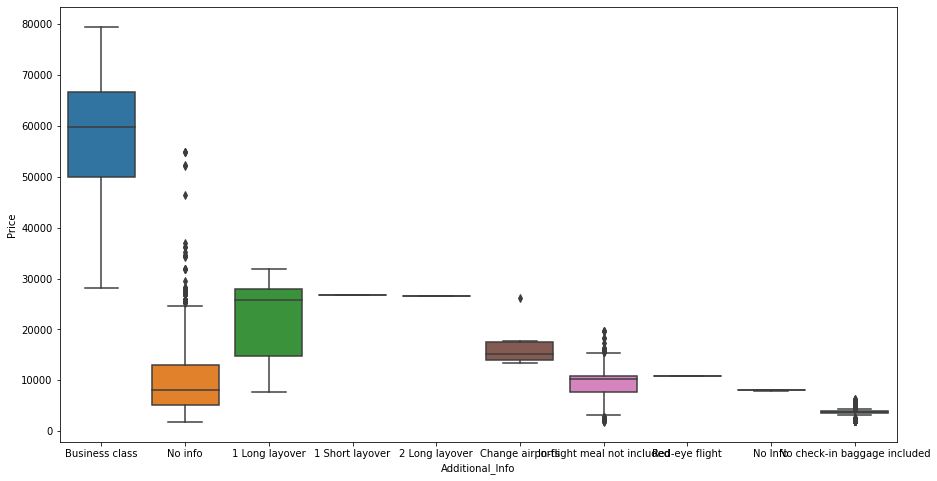

In [195]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Additional_Info',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Total_Stops', ylabel='Price'>

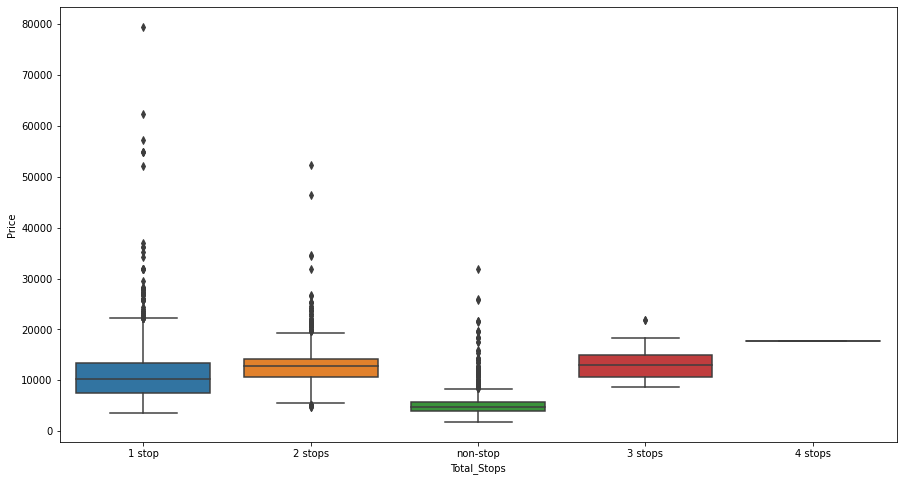

In [192]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Source', ylabel='Price'>

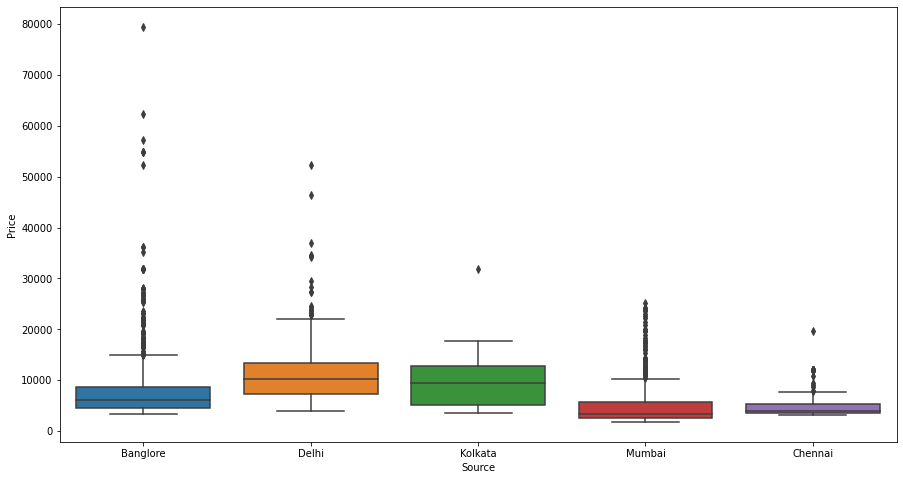

In [196]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

<Axes: xlabel='Destination', ylabel='Price'>

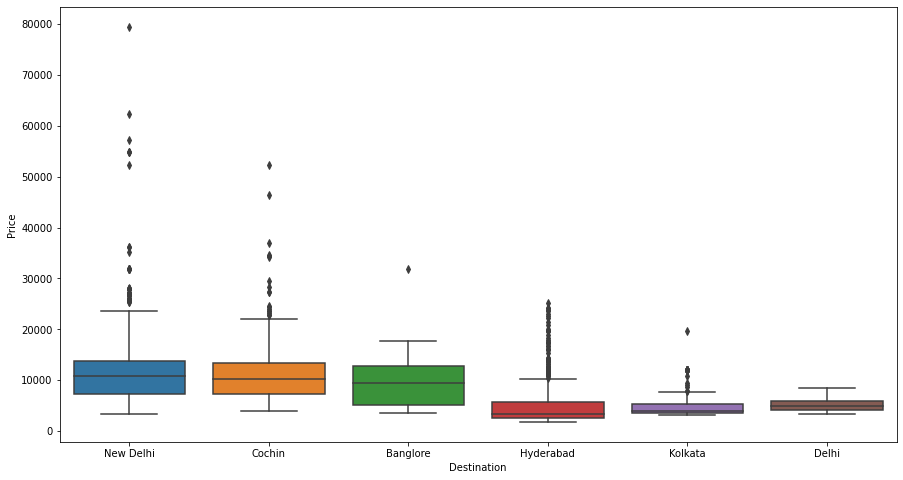

In [198]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))